In [1]:
from glob import glob
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_slice_id(filename):
    """Read slice id from filename."""
    try:
        slice_id = int(os.path.basename(filename).split('.')[0])
    except ValueError:
        slice_id = None

    return slice_id

In [3]:
df_tEntropy = {}
df_fn = {}
for analysis_fn in glob("../data/z-stacks/**/**/*PyIQ_analyze_out.csv"):
    stack_id = analysis_fn.split('/')[3]

    analysis = pd.read_csv(analysis_fn)

    # It is important that all slices are sorted to see if a statistic goes with slice depth.
    analysis["slice_id"] = analysis.apply(lambda x: get_slice_id(x['Filename']), axis=1)
    analysis = analysis.sort_values(by="slice_id")
    analysis.set_index("slice_id")

    df_tEntropy[stack_id] = analysis["tEntropy"].to_numpy()
    df_fn[stack_id] = analysis["Filename"].to_numpy()

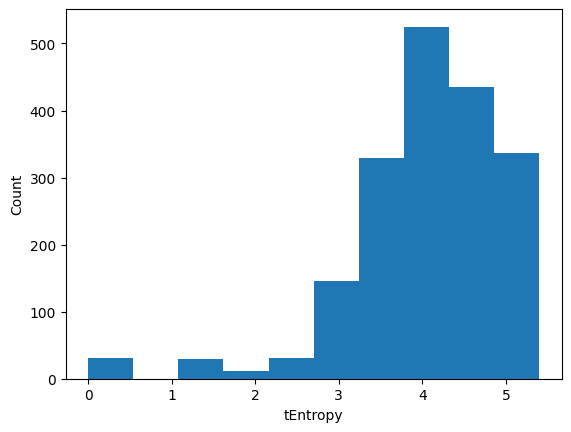

In [4]:
h = np.concatenate([v for v in df_tEntropy.values()])
plt.hist(h)
plt.ylabel("Count")
plt.xlabel("tEntropy")
plt.show()

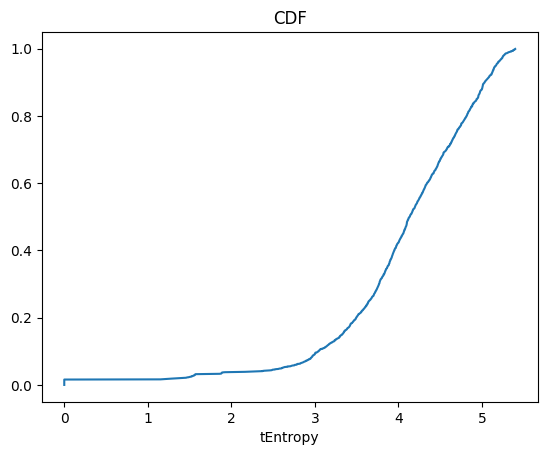

In [5]:
# CDF is the probability that Kurtosis will take a value <= Kurtosis.
# Handy to see how many slices have a specific kurtosis or lower.
plt.plot(np.sort(h), np.array(range(len(h))) / len(h))
plt.title("CDF")
plt.xlabel("tEntropy")
plt.show()

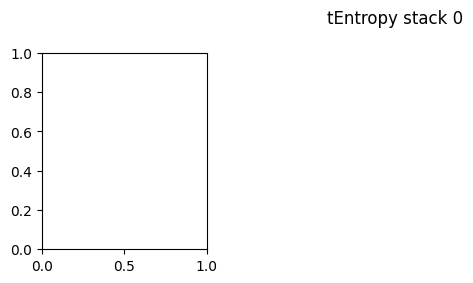

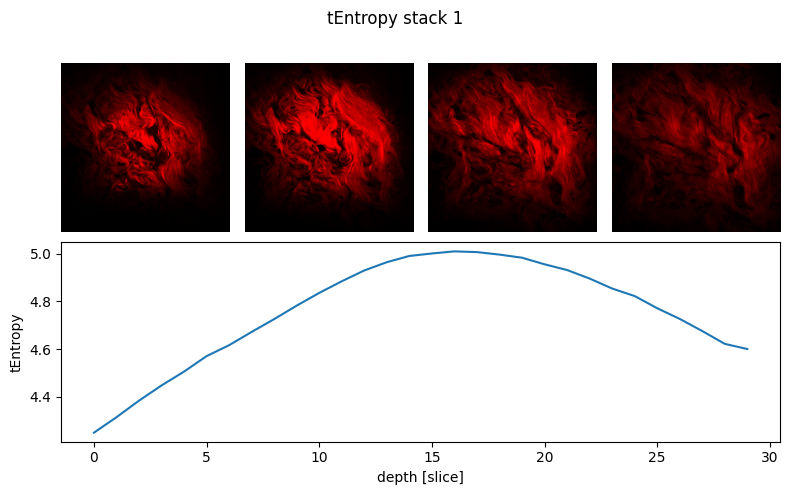

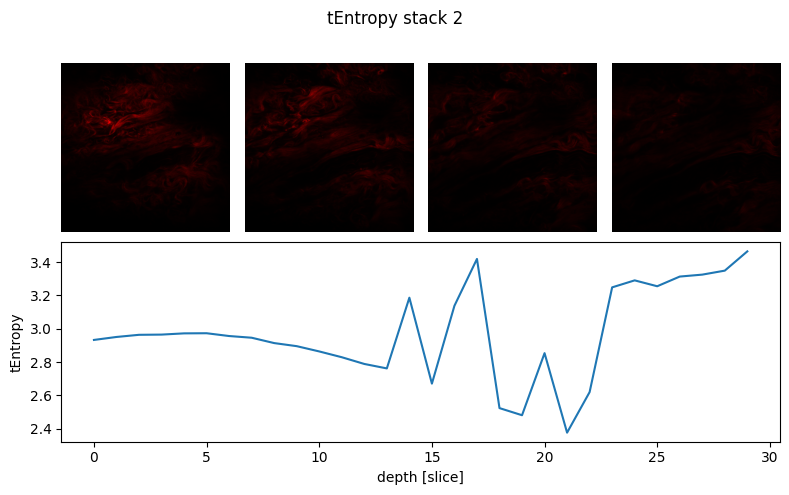

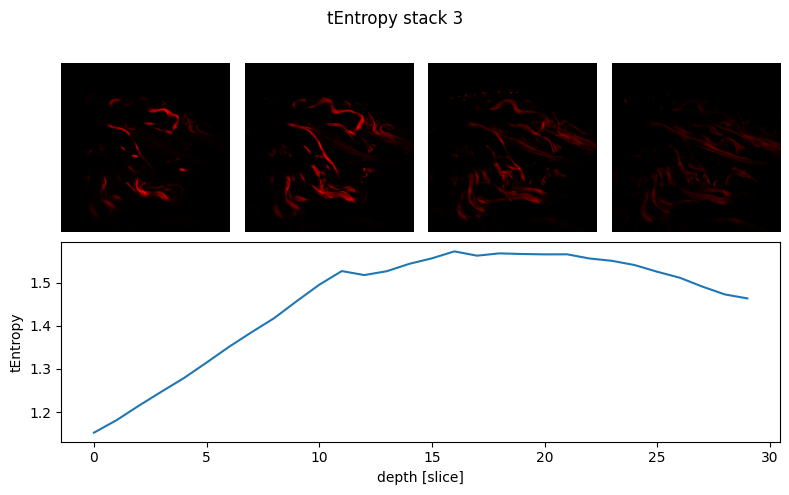

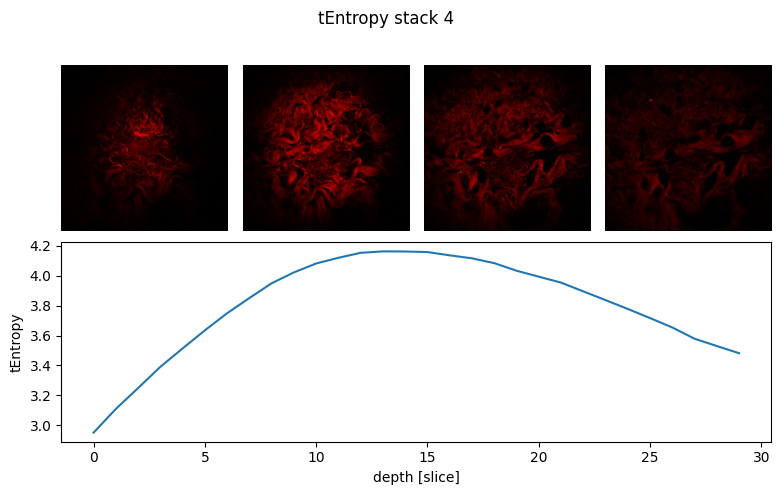

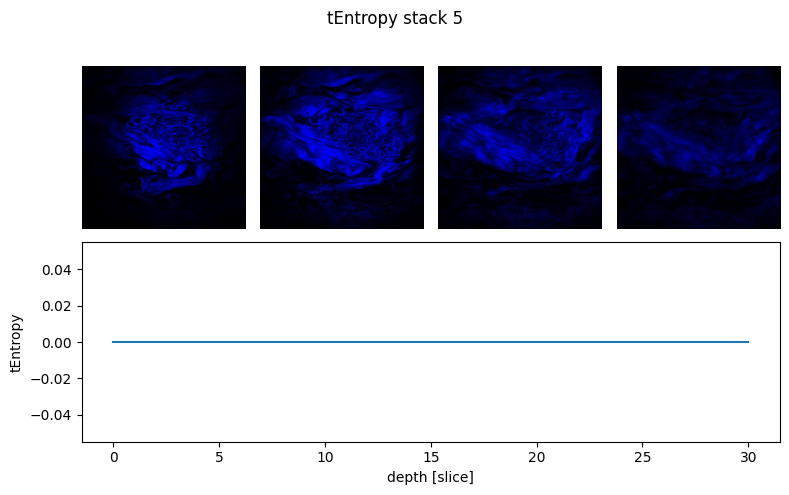

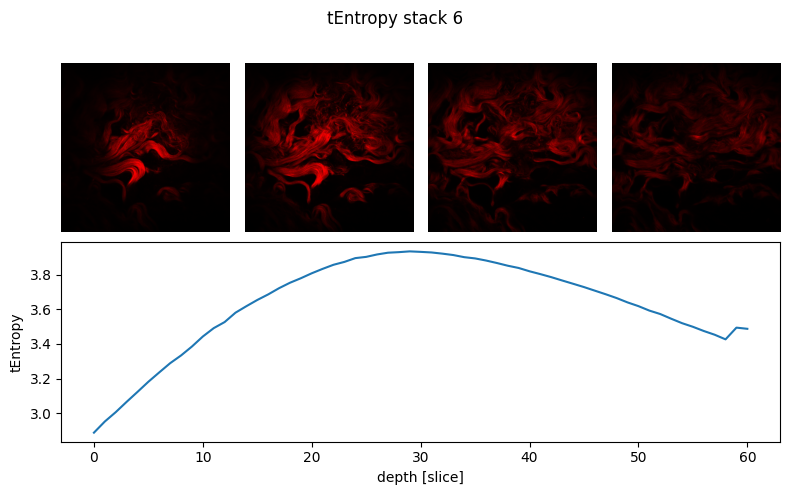

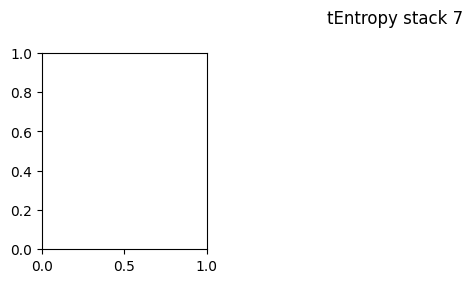

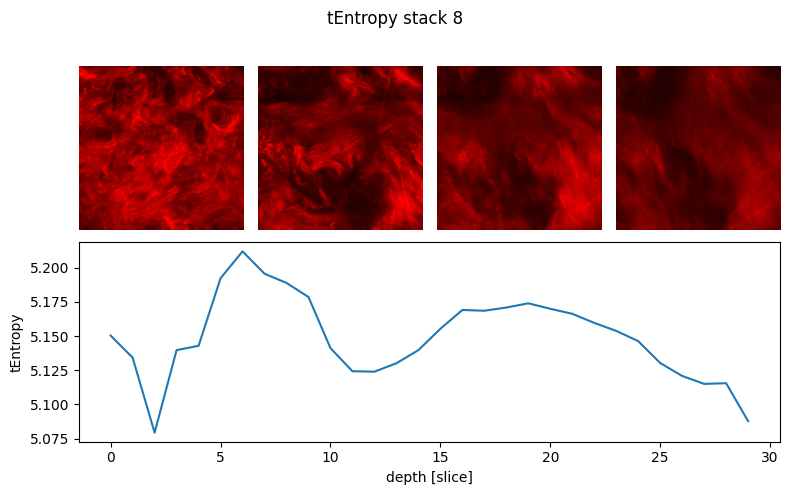

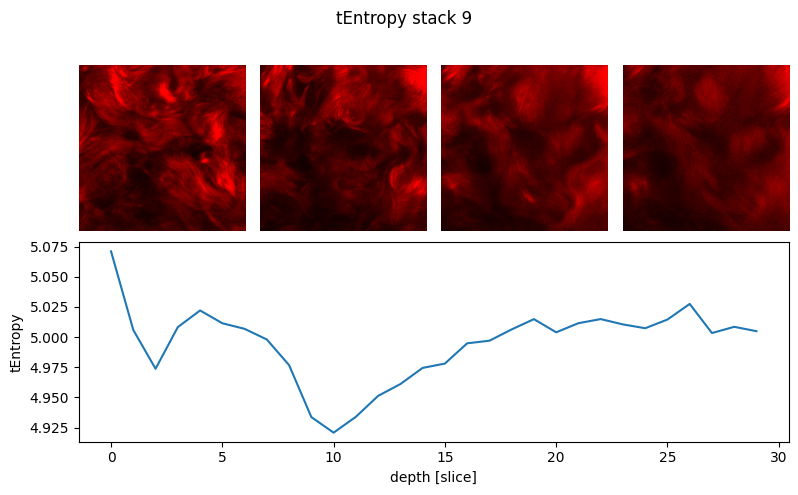

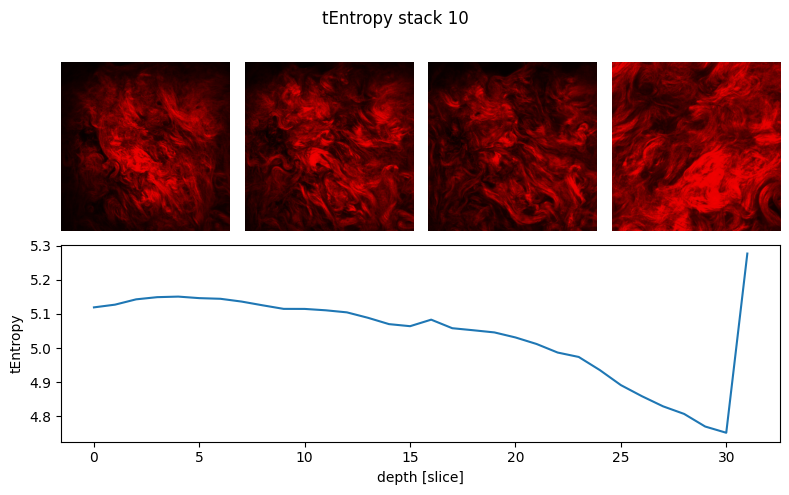

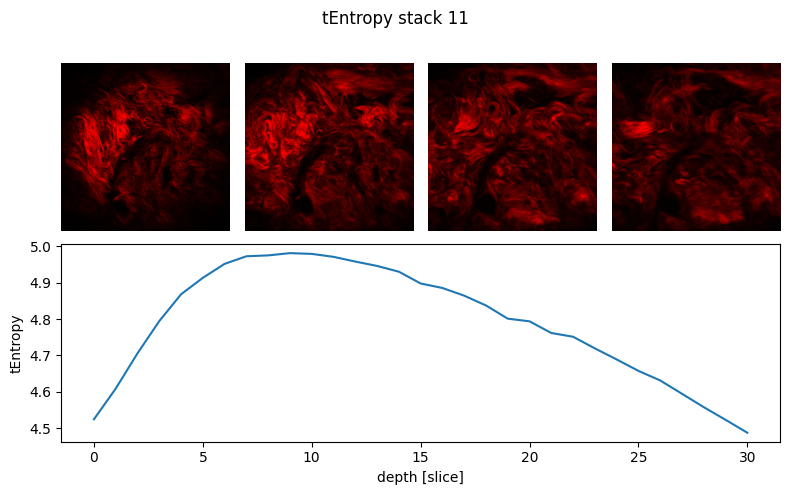

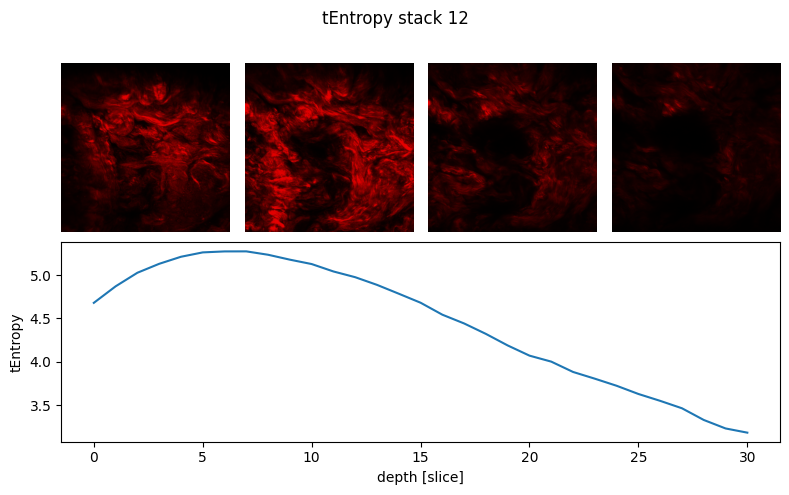

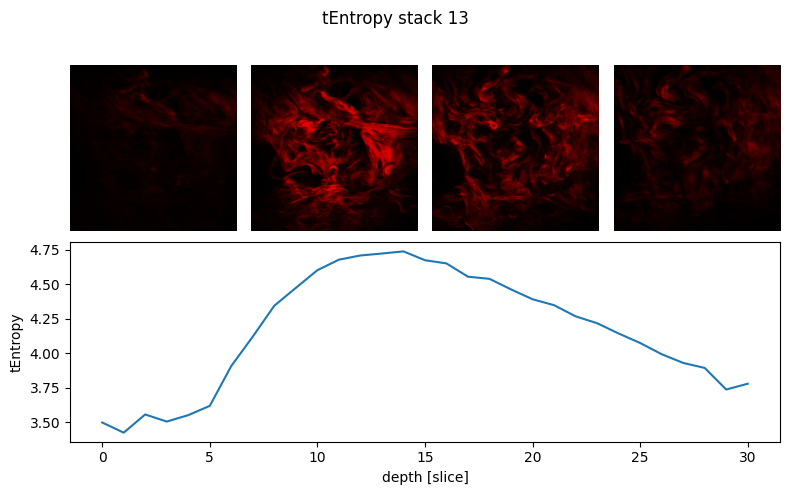

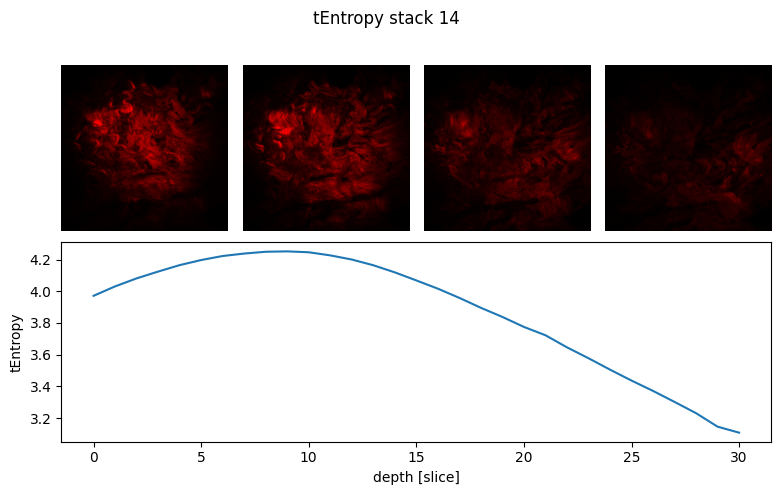

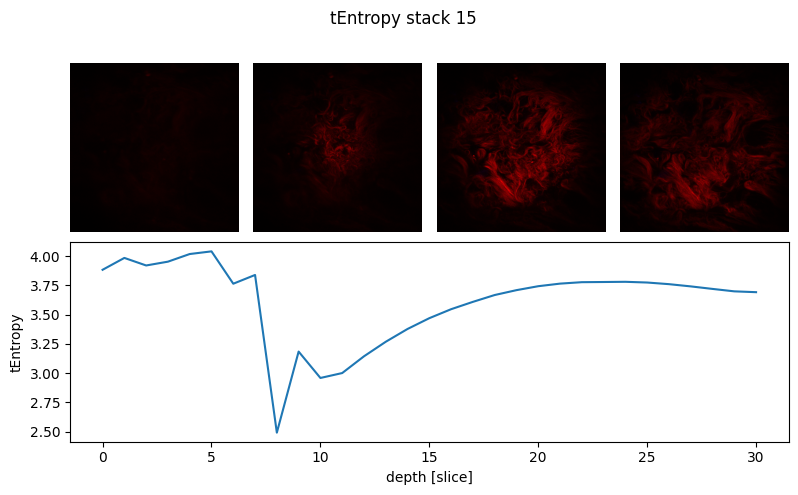

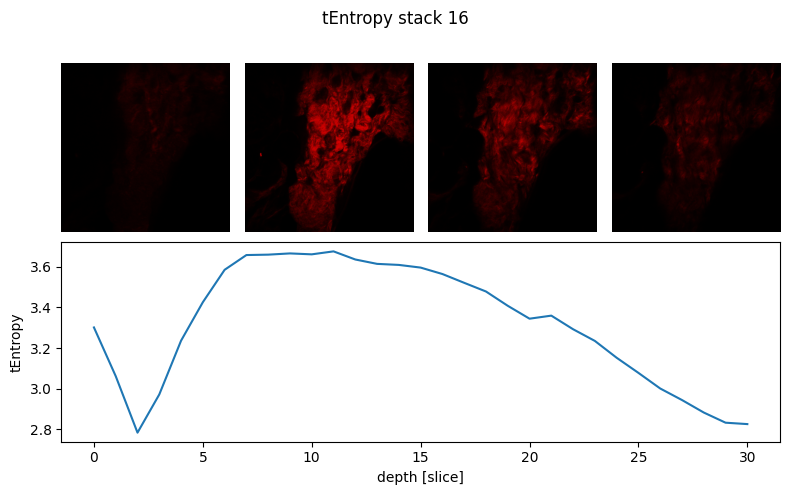

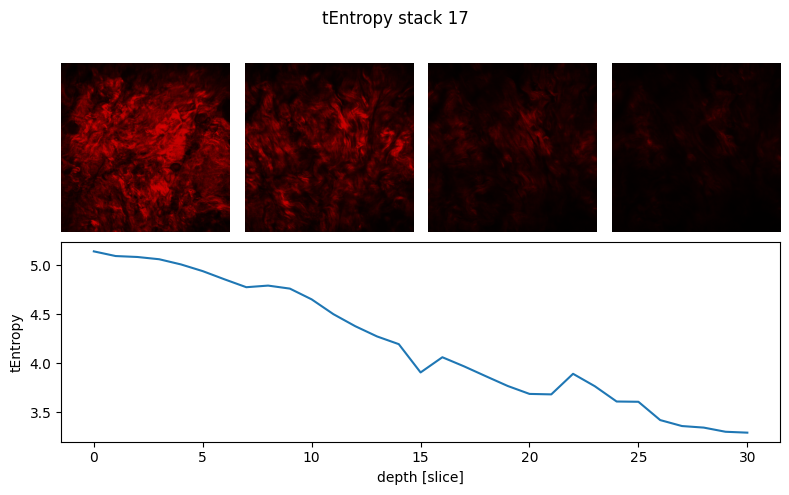

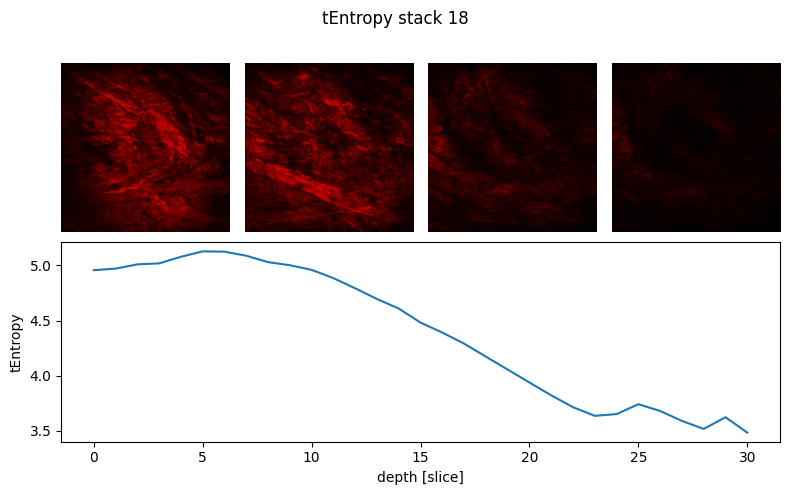

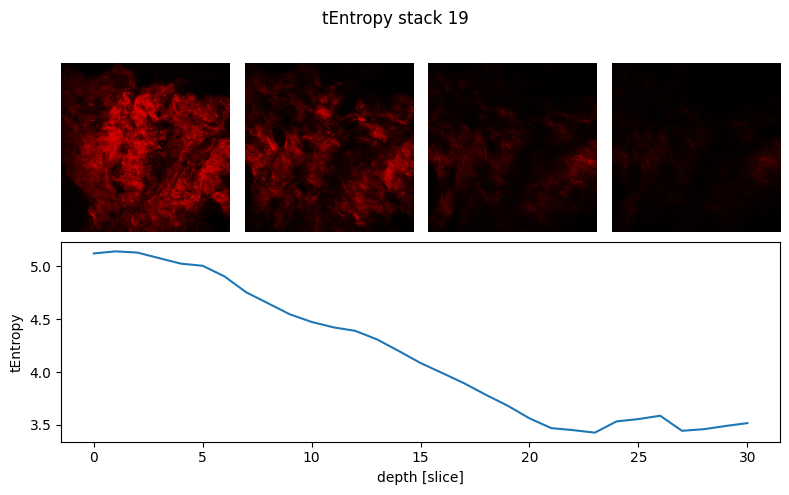

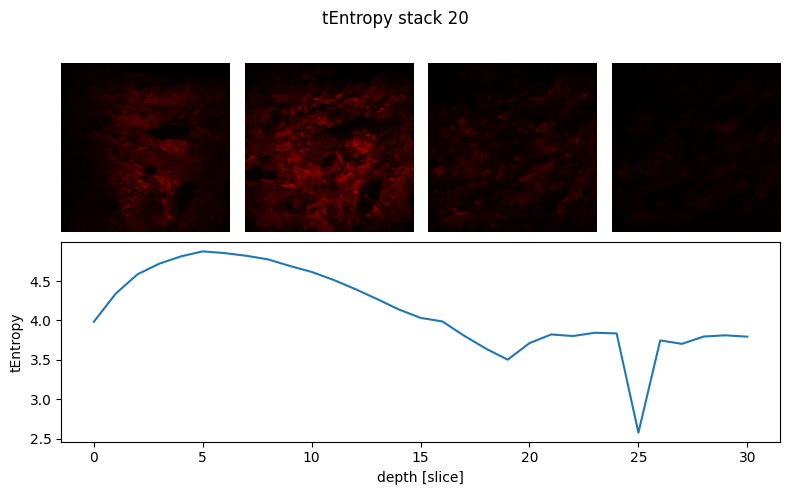

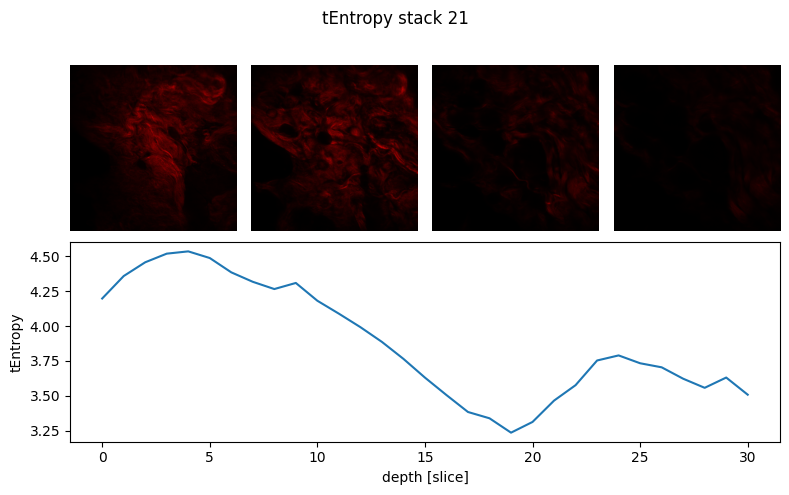

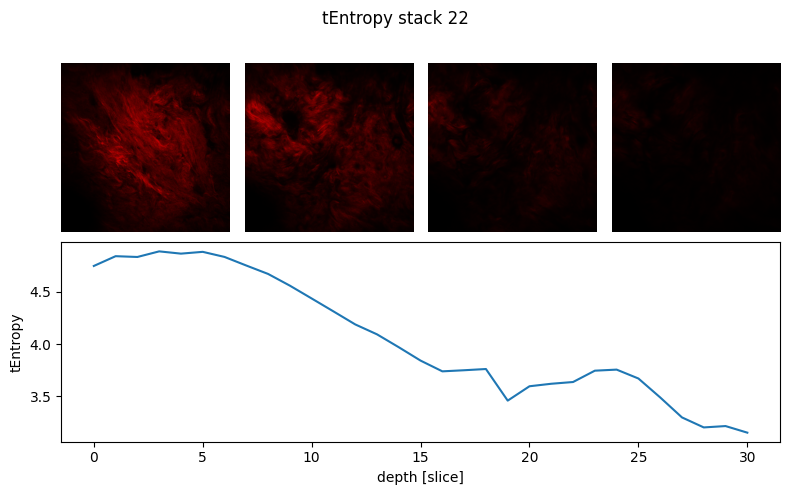

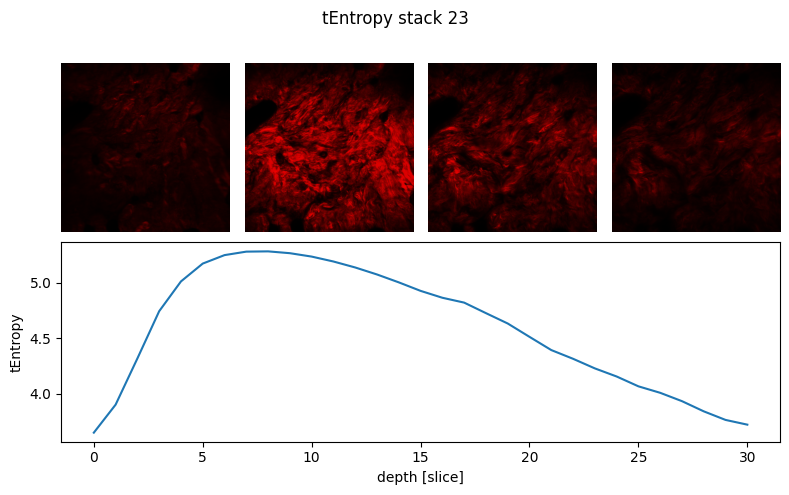

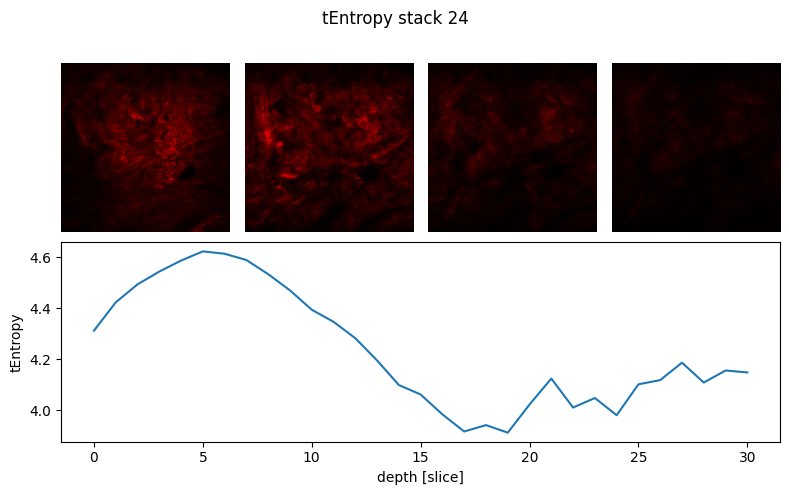

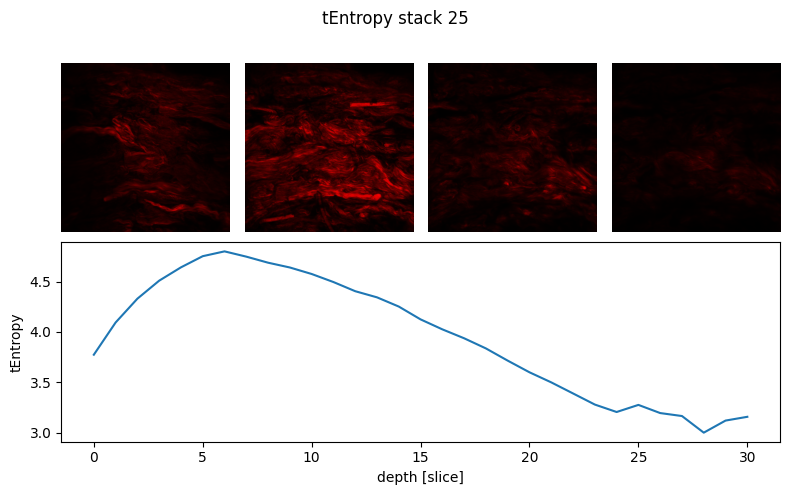

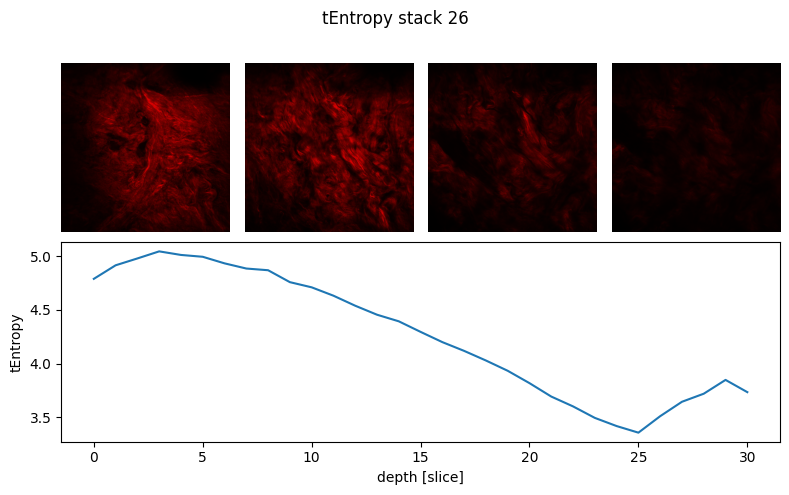

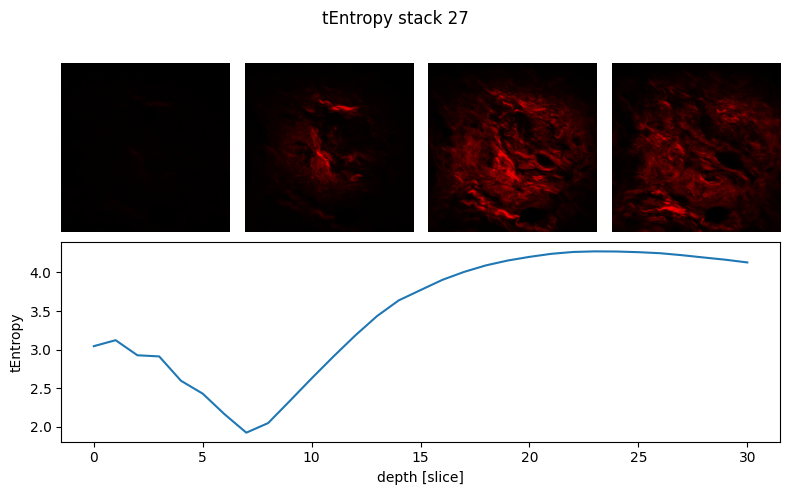

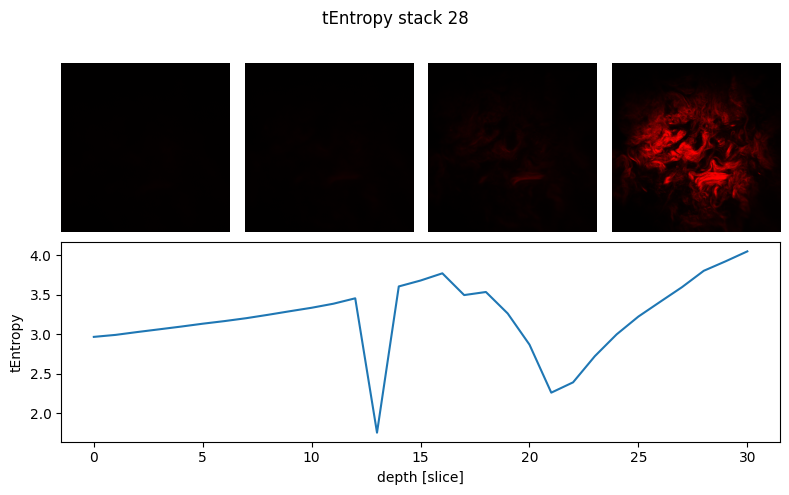

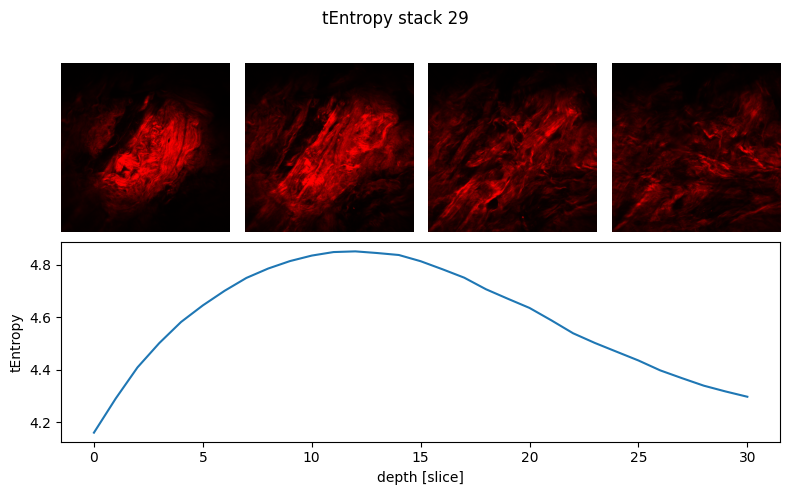

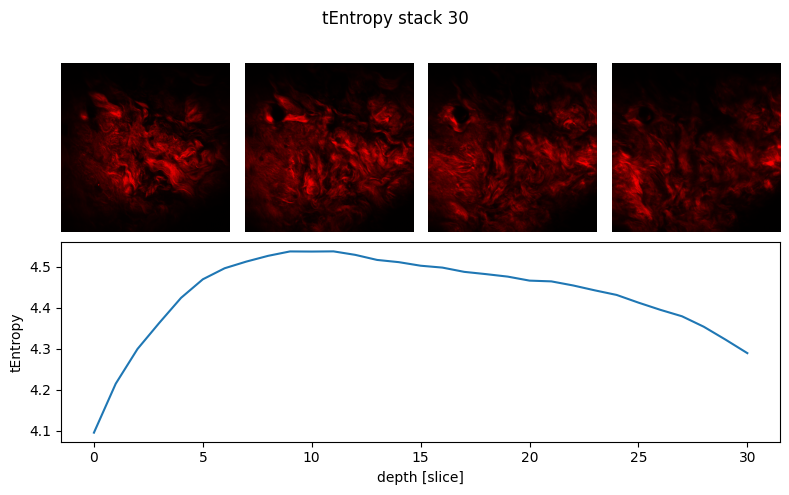

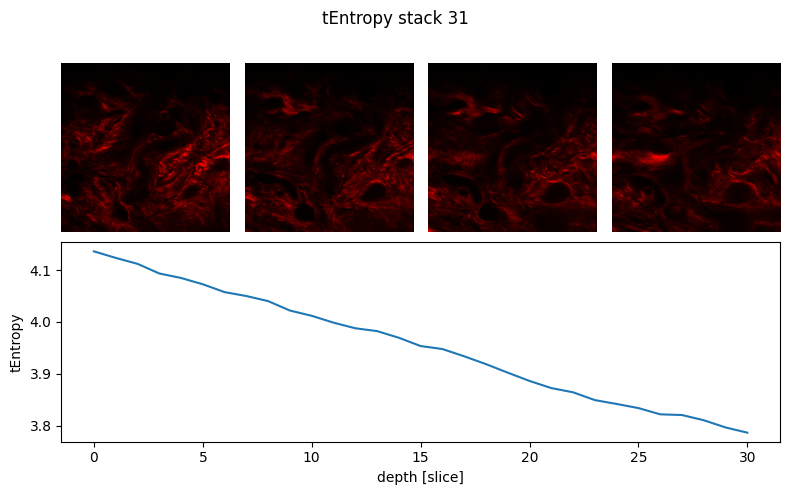

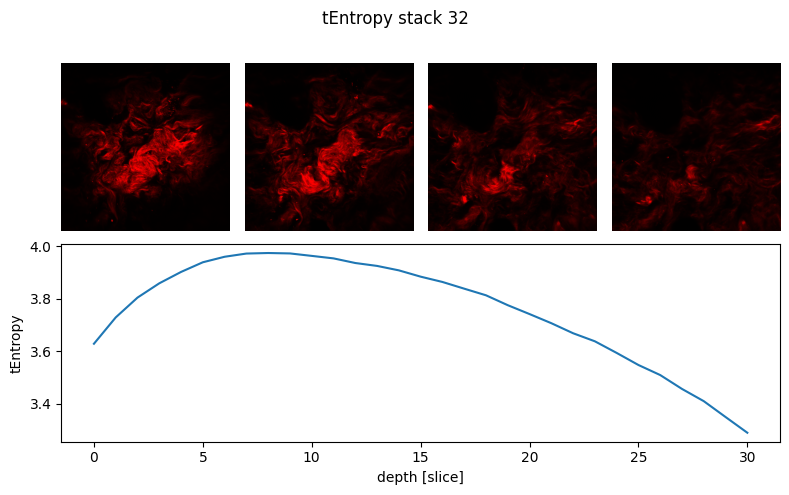

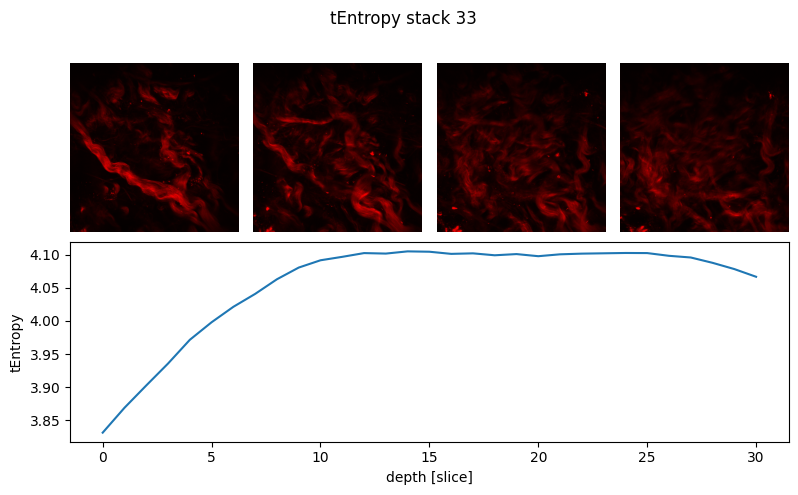

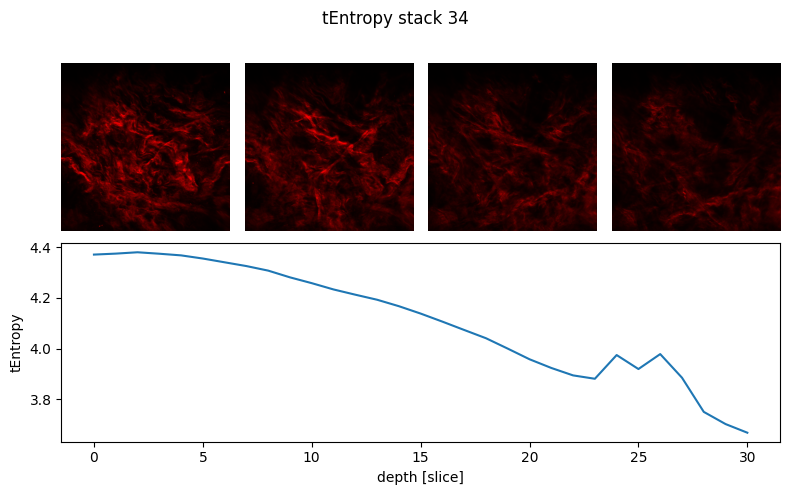

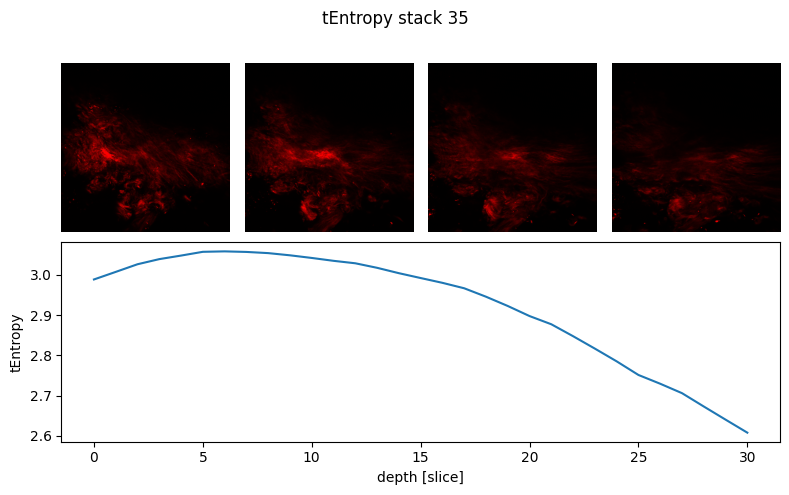

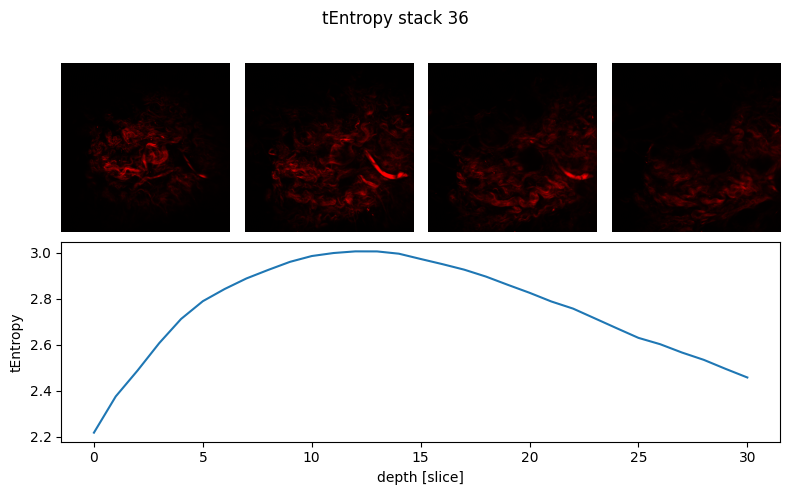

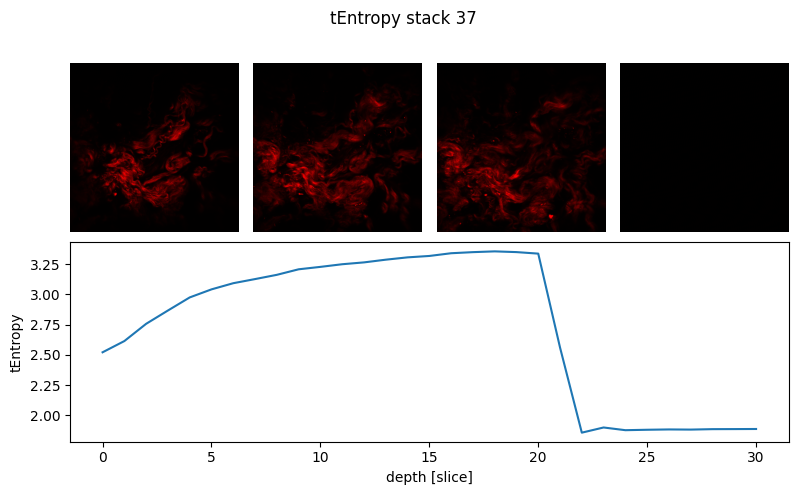

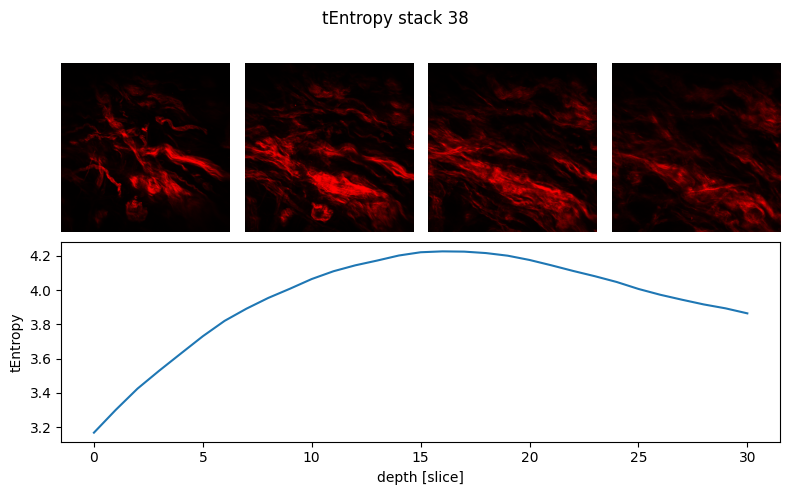

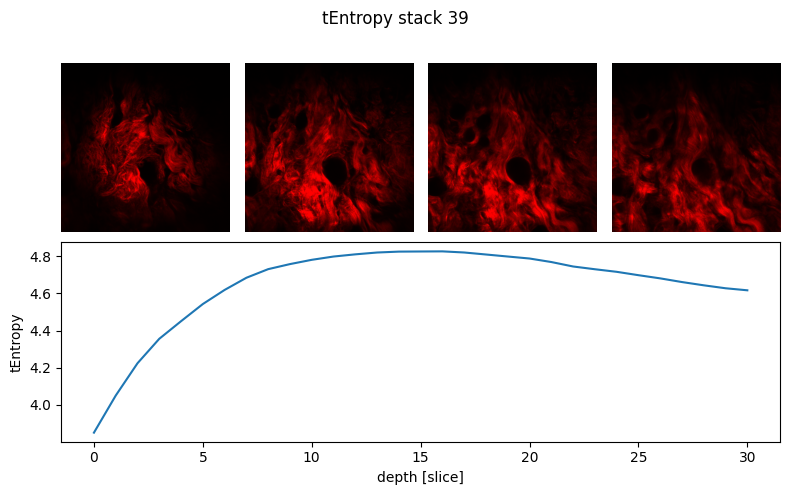

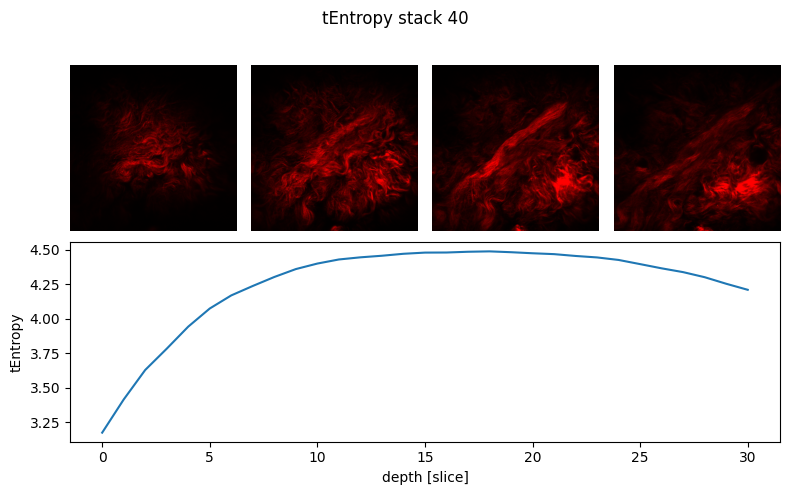

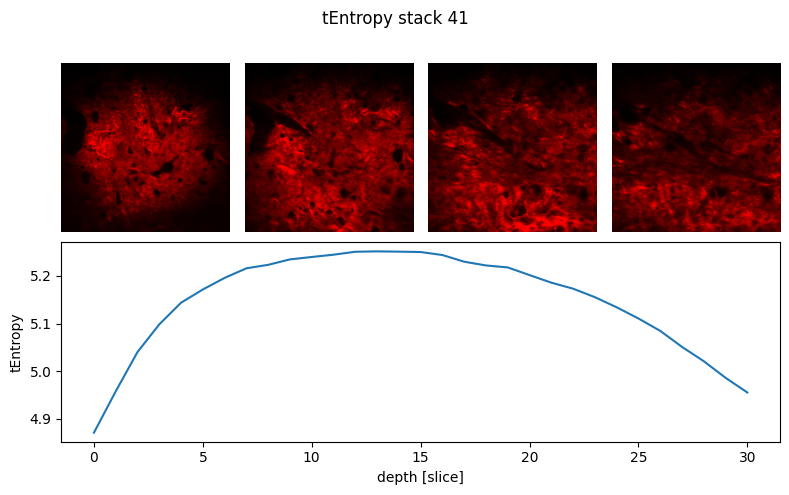

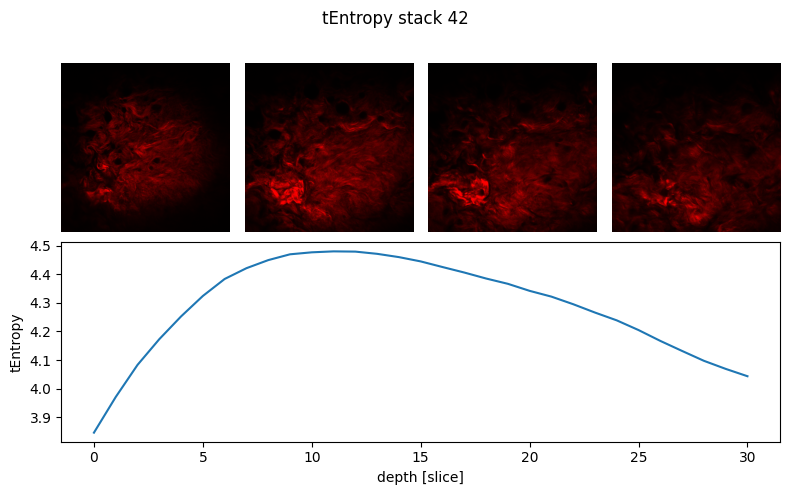

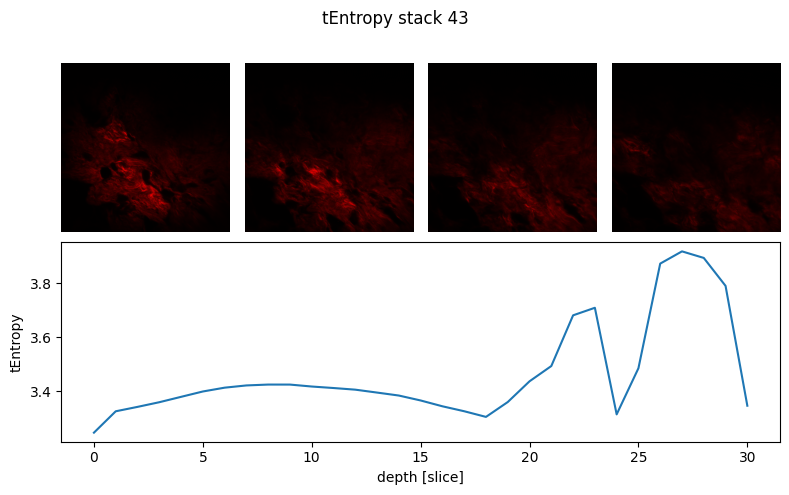

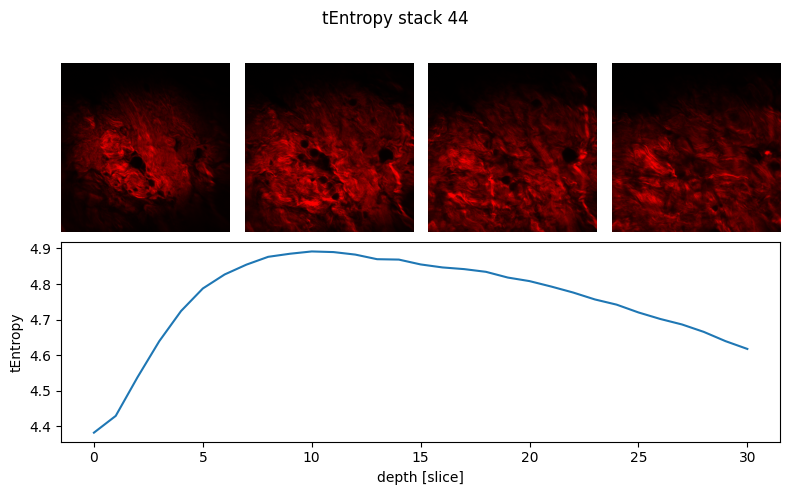

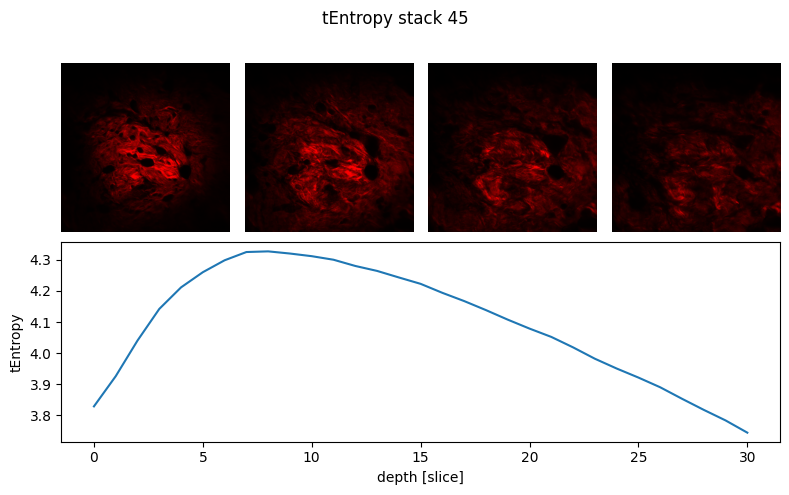

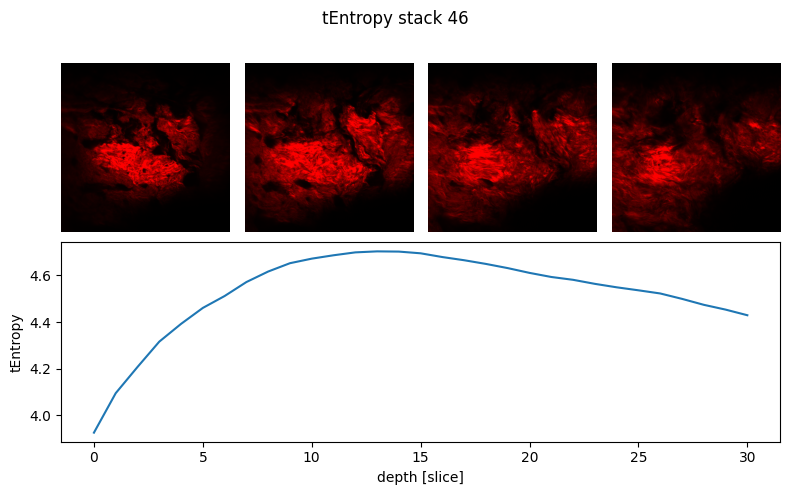

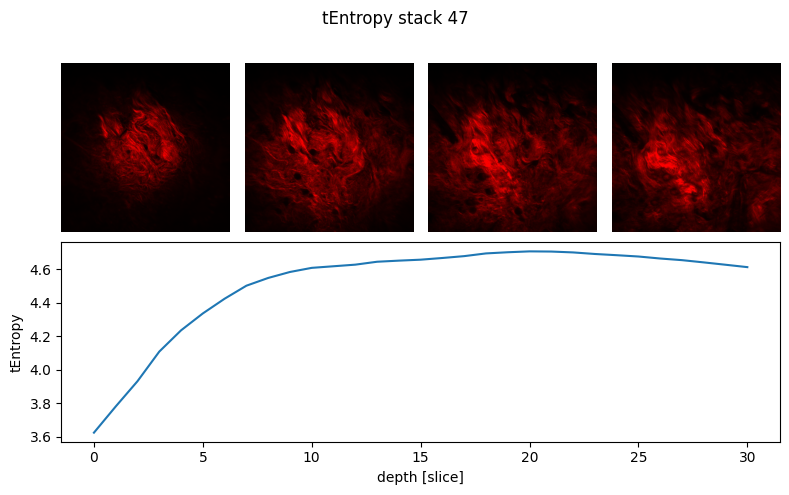

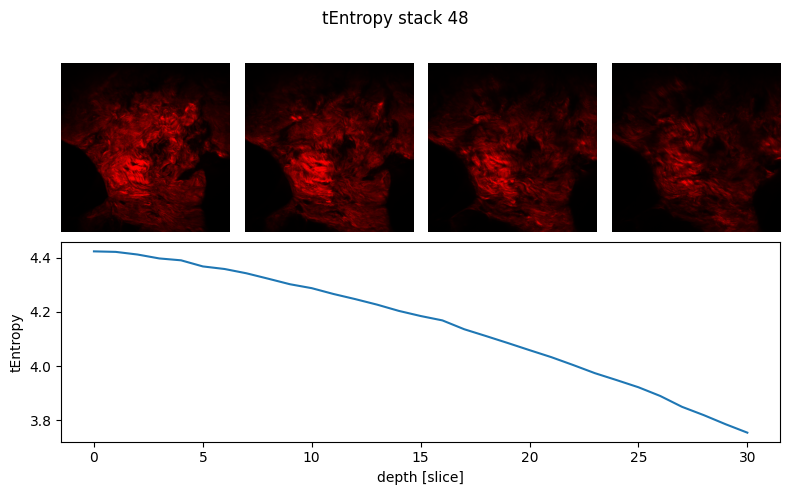

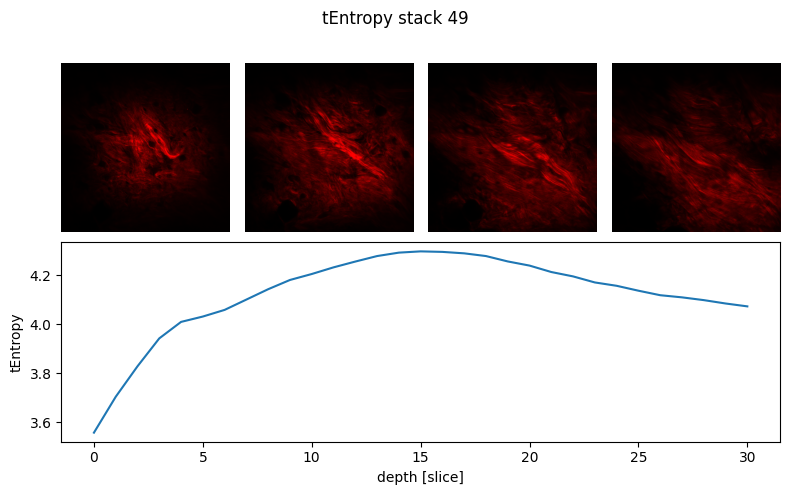

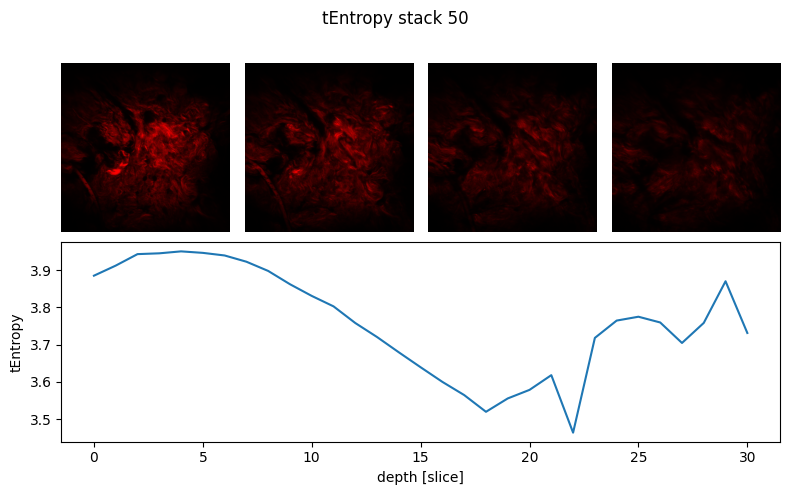

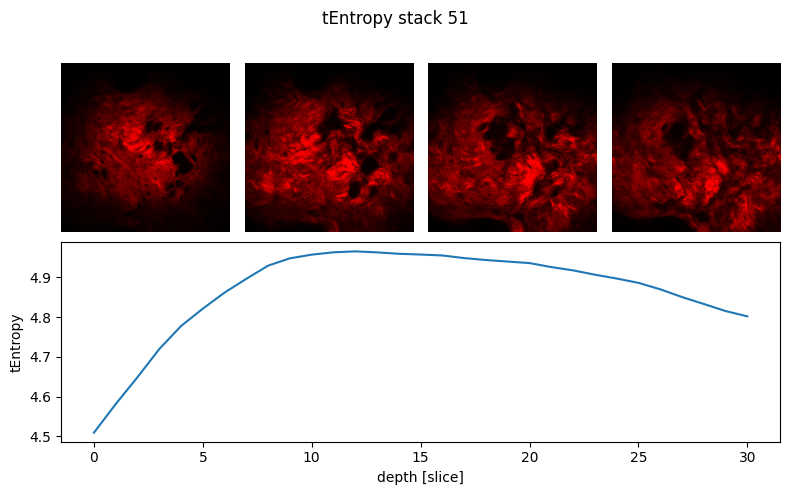

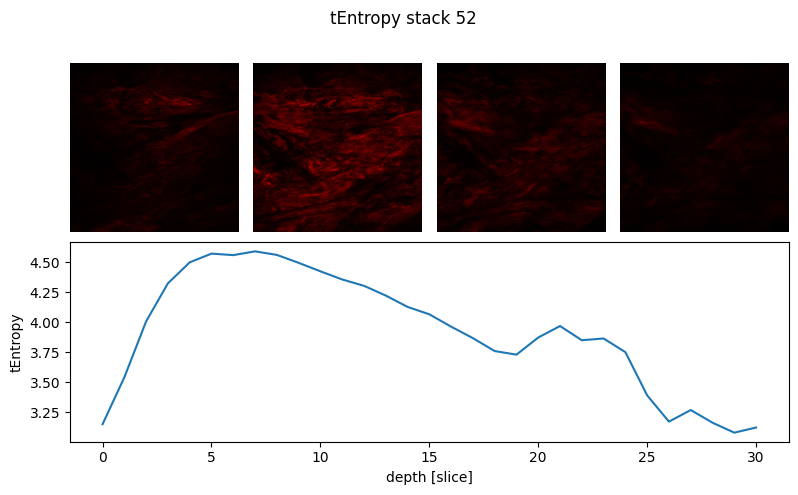

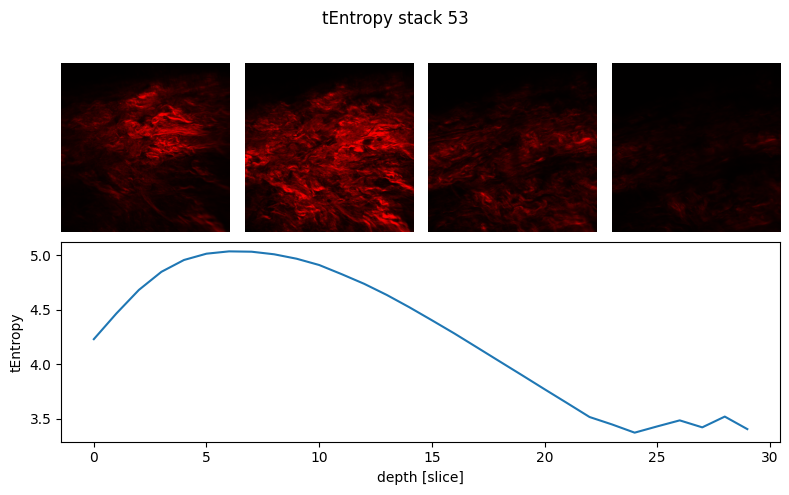

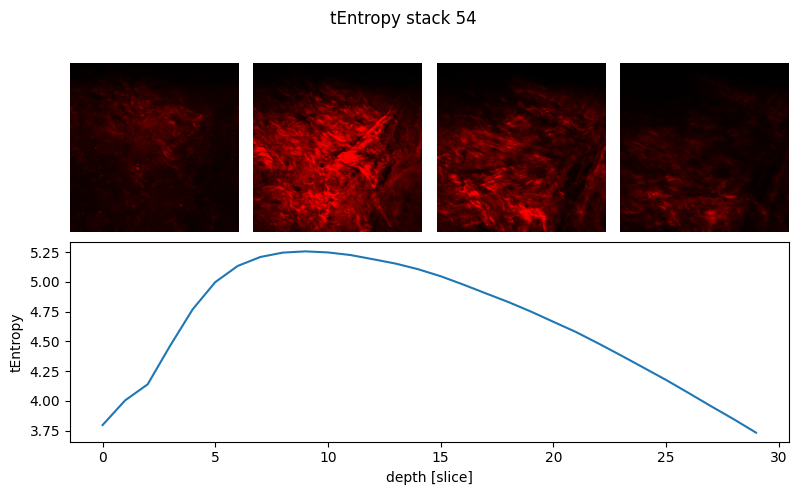

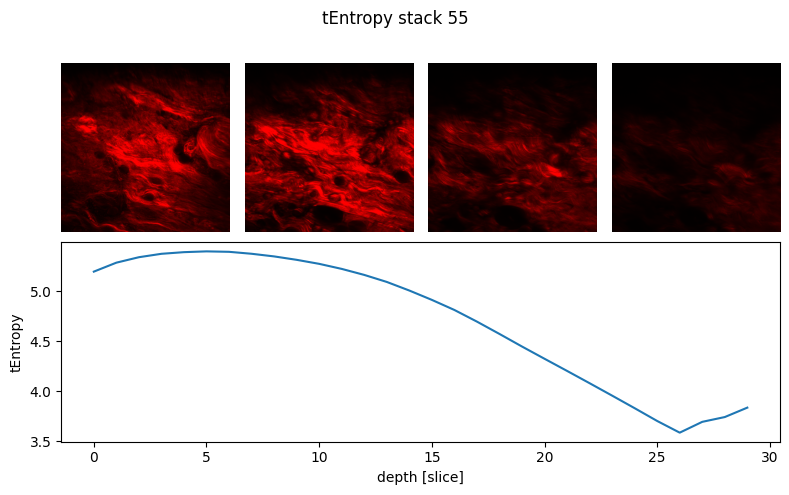

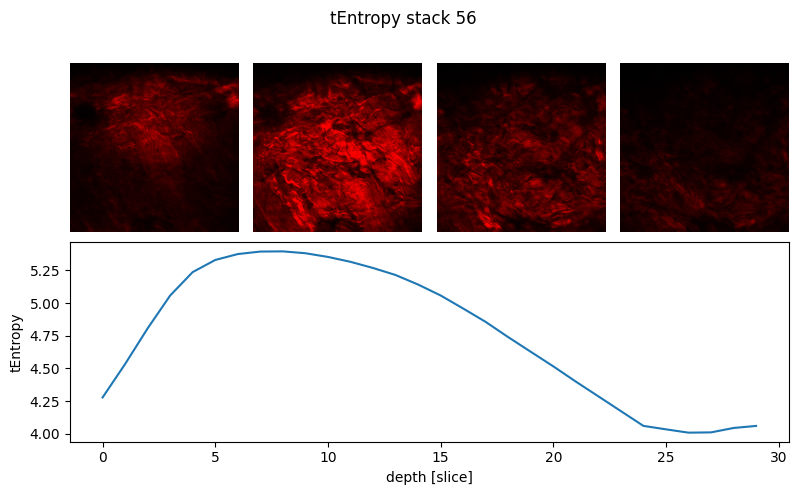

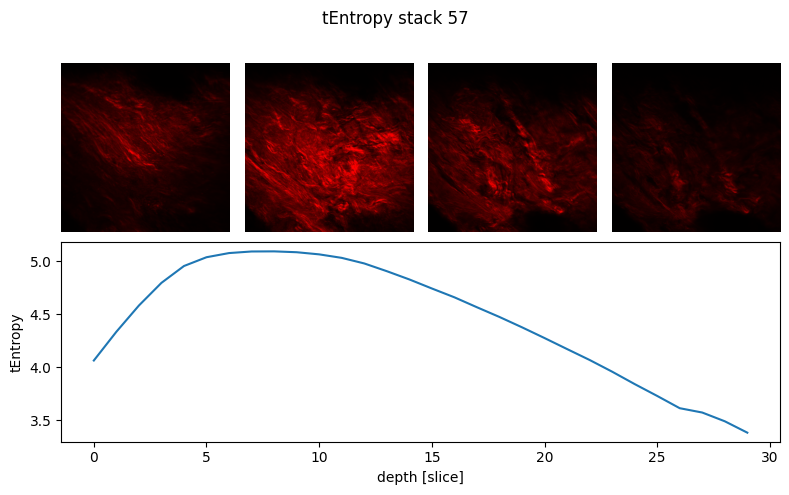

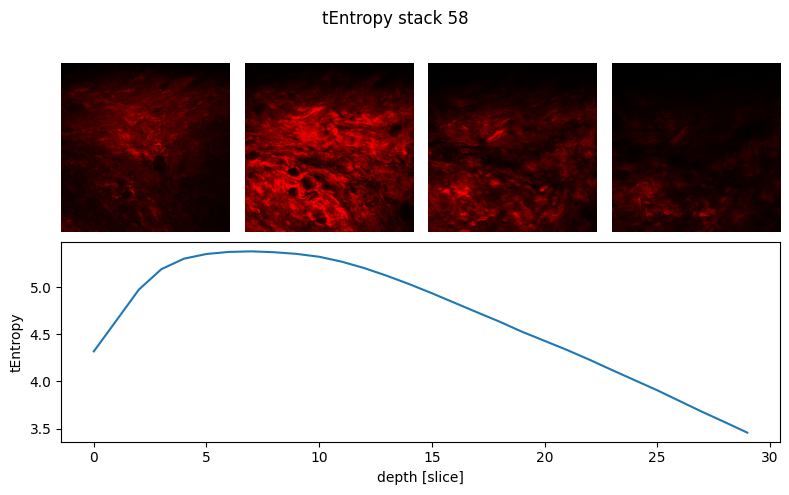

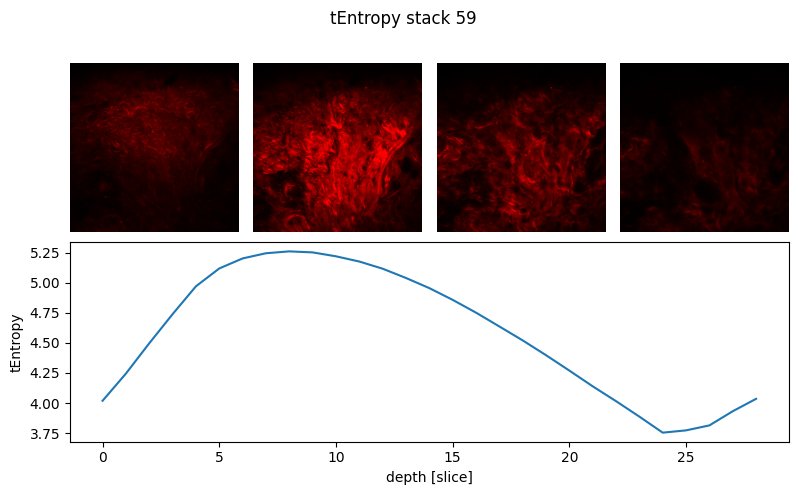

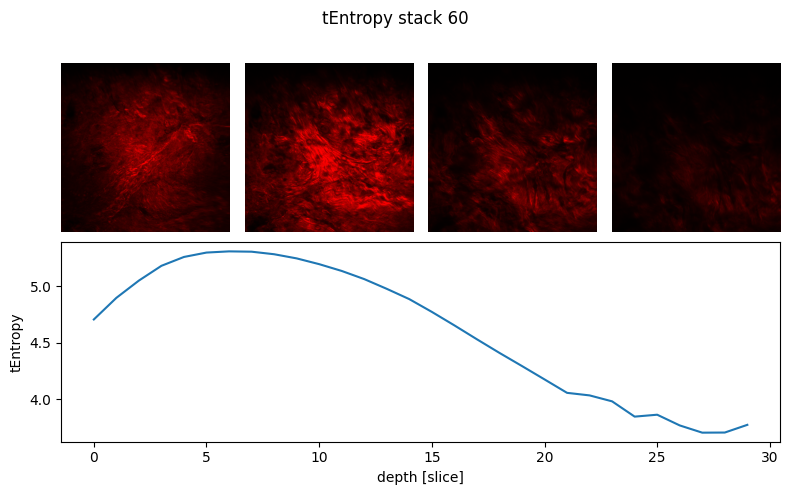

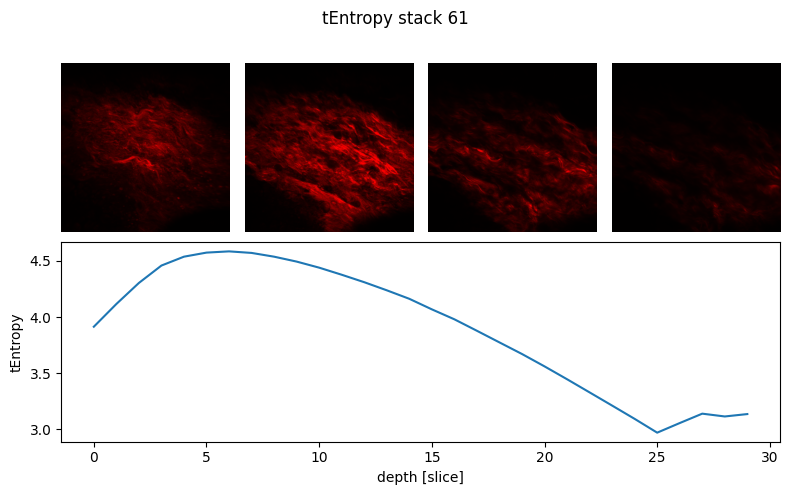

In [6]:
import matplotlib.gridspec as gridspec
from PIL import Image

def get_image_from_axes_idx(stack_id, i):
    stack_fns = df_fn[str(stack_id)]
    im_idx = (len(stack_fns) - 1) / 3 * i
    fn = stack_fns[int(im_idx)]
    return Image.open(fn)

for stack_id in range(62):
    try:
        fig = plt.figure(figsize=(8, 5), tight_layout=True)
        fig.suptitle(f"tEntropy stack {stack_id}")
        gs = gridspec.GridSpec(2, 4)

        for axes_idx in range(4):
            ax = fig.add_subplot(gs[0, axes_idx])
            ax.imshow(get_image_from_axes_idx(stack_id, axes_idx))
            ax.set_axis_off()
        
        ax = fig.add_subplot(gs[1, :])
        ax.plot(df_tEntropy[str(stack_id)])
        ax.set_ylabel("tEntropy")
        ax.set_xlabel("depth [slice]")
        plt.show()
    except (TypeError, KeyError):
        continue
